# Introduction to Optimization (BYU ME 431 / ECE 483)

It is important to understand that this intro is not meant as an exhaustive resource to learn about optimization. In fact, it is really only meant to help us understand the very basic ideas at a high level. The motivation for this to then better understand more about the feedback control topics of linear quadratic regulators (LQR) and model predictive control (MPC) at an undergraduate level. 

Let's start by looking at the definition of a basic function and its plot to understand what we mean by "minimizing": 

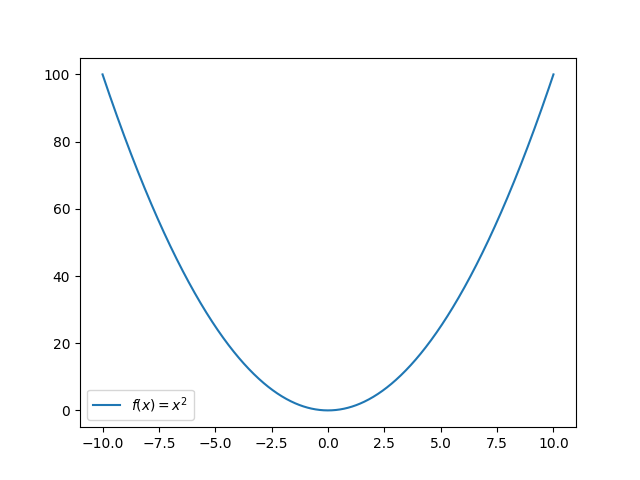

In [42]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def test_function(x): 
    f = x**2
    return f


x = np.linspace(-10, 10, 1000)
y = test_function(x)

plt.figure()
plt.plot(x, y, label=r'$f(x) = x^2$')
plt.legend()

# A Minimum

Given the plot above, how can we find the minimum, or the value for $x$ where $f(x)$ is the smallest? In this case, it is quite simple and we can define it by inspection (as $x=0$). However, this is a great opportunity to understand a little about how optimization works. If we assume that we do not know the solution, but instead we only have access to our function, and our first guess for the optimimum was $x=8$, how could we proceed? The following shows a very simple method for using the derivative of our cost function (or gradient in the case of multi-variable problems) to decrease the cost in an interative fashion. 

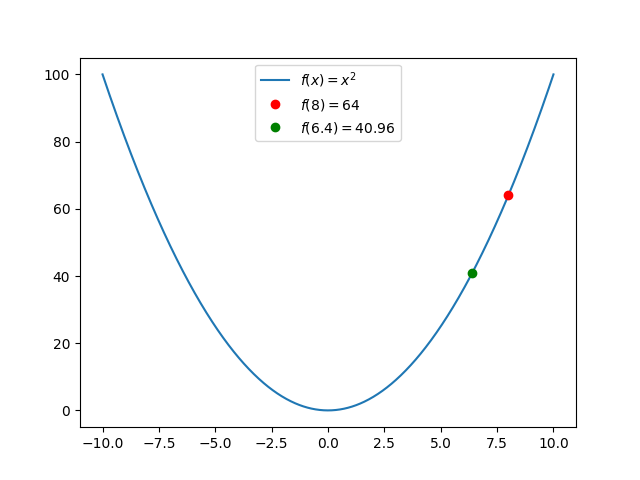

In [43]:
def deriv_of_test_function(x): 
    f_prime = 2*x
    return f_prime

x_0 = 8.0
y_0 = test_function(x_0)

# we want to reduce our current cost of f(4), so we try to move x_0 in a "good direction," one that 
# will decrease the cost. 
x_1 = x_0 - 0.1*deriv_of_test_function(x_0)

# why did we negate the derivative? and why did we scale it by 0.1? 
# let's evaluate our function at the new point, x_1:
y_1 = test_function(x_1)

plt.figure()
plt.plot(x, y, label=r'$f(x) = x^2$')
plt.plot(x_0, y_0, 'ro', label=r'$f(8) = 64$')
plt.plot(x_1, y_1, 'go', label=r'$f(6.4) = 40.96$')
plt.legend()

Did taking a step (or modifying our guess for $x_0$) by using the negative of the derivative of the cost function work (i.e. $-\frac{\partial{f}}{\partial{x}}$)? Did it decrease the cost? 

Because this function ($f(x) = x^2$) is so simple, we may be wondering why we need a method like this at all. And in truth, we could just randomly sample values for $x$ from our function $f(x)$ until we found the minimum or something close to it. In fact, there are many sampling-based methods that can be appropriate depending on the problem form and complexity. But these methods will almost always be slower than using a method related to the derivative as we've shown above. In this case we don't know how big of a step in the direction of $-\frac{\partial{f}}{\partial{x}}$ that we should take, and using $0.1$ was fairly arbitrary. There are actually methods using second derivatives (or the Hessian) that will show us what step (or approximate step) size to take. This works especially well if the cost function is quadratic or if it can be approximated that way. 

Regardless, even if we are not clever about the step size, this method can work to cause us to converge to the minimum if we just repeat the process iteratively as shown below. 

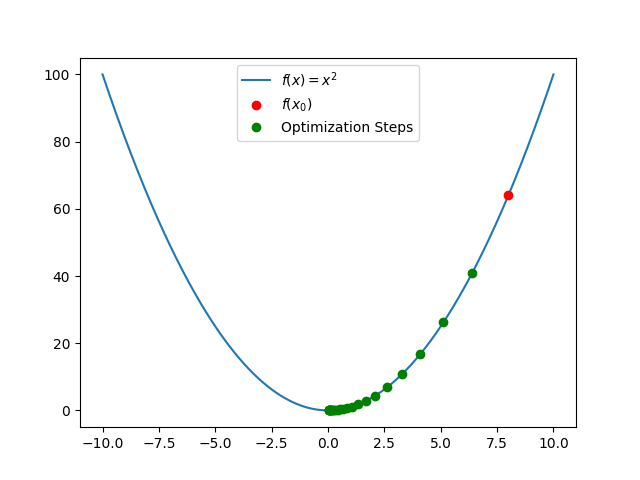

In [44]:
y_cur = y_1
x_cur = x_1

x_opt_process = [x_1]
y_opt_process = [y_1]

# this condition only works because I know that the function is convex and has a minimum at 0.
while y_cur > 0.001: 
    x_cur = x_cur - 0.1*deriv_of_test_function(x_cur)
    y_cur = test_function(x_cur)

    x_opt_process.append(x_cur)
    y_opt_process.append(y_cur)

plt.figure()
plt.plot(x, y, label=r'$f(x) = x^2$')
plt.plot(x_0, y_0, 'ro', label=r'$f(x_0)$')
plt.plot(x_opt_process, y_opt_process, 'go', label='Optimization Steps')
plt.legend()

At this point, we may wonder if this works for other functions or starting positions. Let's try it: 

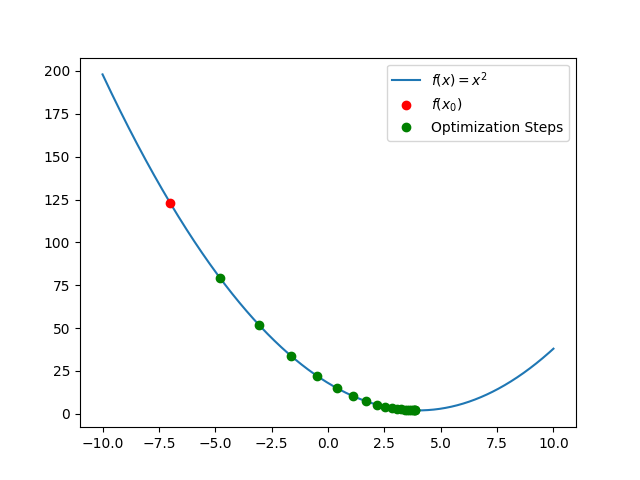

In [45]:
def test_function(x): 
    f = (x-4)**2 + 2
    return f

def deriv_of_test_function(x): 
    f_prime = 2*(x-4)
    return f_prime

x = np.linspace(-10, 10, 1000)
y = test_function(x)

x_0 = -7.0
y_0 = test_function(x_0)

y_cur = y_0
x_cur = x_0

def optimize(x_cur, y_cur, test_function, deriv_of_test_function):
    x_opt_process = []
    y_opt_process = []

    # we need a new condition since we no longer know the minimum exactly. 
    # we can just check to see if y_cur is decreasing slowly to see if we've converged.
    y_diff = 1000.0
    y_prev = y_cur
    while np.abs(y_diff) > 0.01:
        x_cur = x_cur - 0.1*deriv_of_test_function(x_cur)
        y_cur = test_function(x_cur)
        
        x_opt_process.append(x_cur)
        y_opt_process.append(y_cur)

        y_diff = y_cur - y_prev
        y_prev = y_cur

    return x_opt_process, y_opt_process

x_opt_process, y_opt_process = optimize(x_cur, y_cur, test_function, deriv_of_test_function)

plt.figure()
plt.plot(x, y, label=r'$f(x) = x^2$')
plt.plot(x_0, y_0, 'ro', label=r'$f(x_0)$')
plt.plot(x_opt_process, y_opt_process, 'go', label='Optimization Steps')
plt.legend()


So it works! At least for simple functions. Let's try it for one more function that is not quadratic and see the problem of "local minima":

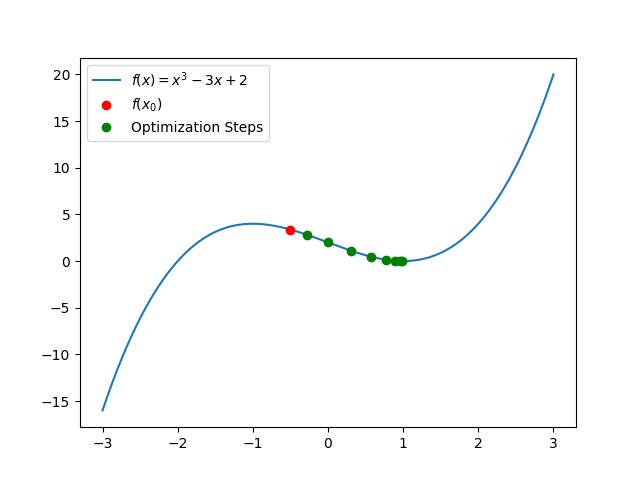

In [46]:
def test_function (x):
    f = x**3 - 3*x + 2
    return f

def deriv_of_test_function(x):
    f_prime = 3*x**2 - 3
    return f_prime

x = np.linspace(-3, 3, 1000)
y = test_function(x)

x_0 = -.5
y_0 = test_function(x_0)

y_cur = y_0
x_cur = x_0

x_opt_process, y_opt_process = optimize(x_cur, y_cur, test_function, deriv_of_test_function)

plt.figure()
plt.plot(x, y, label=r'$f(x) = x^3 - 3x + 2$')
plt.plot(x_0, y_0, 'ro', label=r'$f(x_0)$')
plt.plot(x_opt_process, y_opt_process, 'go', label='Optimization Steps')
plt.legend()


Is this the minimum? By inspection, what would the minimum be? in a practical engineering application, what would stop us from moving $x$ to $-\infty$? To summarize, our current method to optimize did NOT find the minimum. And in most problems we would have a limit or constraint on $x$ that would cause our minimum to be at the constraint on the left side of this plot instead of going to $-\infty$. 

Much of the complexity of optimization comes as we look in more detail at how to approximate cost functions to look quadratic, or how to determine the right step size. However, the basic principles of what we have seen here still apply. 

# Constraints

What about optimimizations where we cannot change $x$ to be whatever value we want? Controls problems are a good example of this, where our state variable $x$ may have physical limits, or the input $u$ may also saturate or be limited. To handle constraints, we have to introduce additional principles that are beyond the scope of this lesson. But we can use existing libraries and tools to visualize the effects of these constraints. 

Let's start with the same example as before but if we require $x\geq 2$, how does that change the problem? By inspection, can you still determine the minimum? 

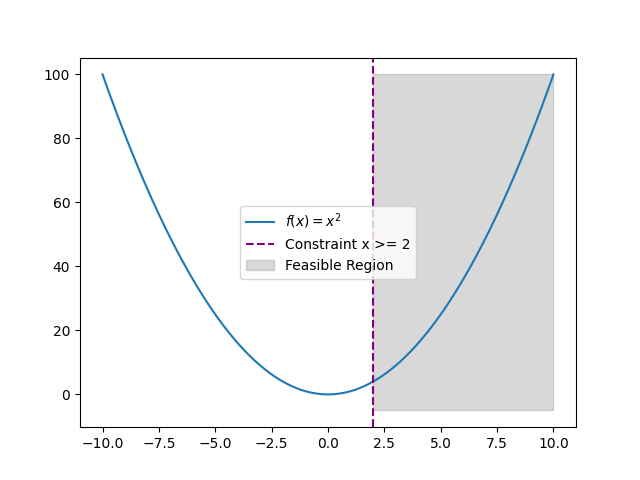

In [47]:
def objective(x): 
    f = x**2
    return f

x = np.linspace(-10, 10, 1000)
y = objective(x)

plt.figure()
plt.plot(x, y, label=r'$f(x) = x^2$')
plt.axvline(2, color='purple', linestyle='--', label=f'Constraint x >= 2')
plt.fill_between(x, -np.ones(len(x))*5, np.ones(len(x))*100, where=(x >= 2), alpha=0.3, color='gray', label='Feasible Region')
plt.legend()


What if instead of an inequality constraint, it is an equality constraint? Such as $x=2$? 

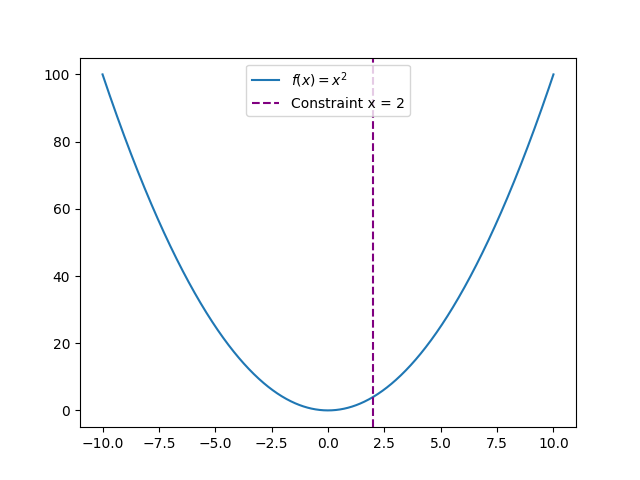

In [48]:
def objective(x): 
    f = x**2
    return f

x = np.linspace(-10, 10, 1000)
y = objective(x)

plt.figure()
plt.plot(x, y, label=r'$f(x) = x^2$')
plt.axvline(2, color='purple', linestyle='--', label=f'Constraint x = 2')
plt.legend()

In this problem the equality constraint only overlaps with our cost function in one place. So that is the only possible solution. Even if there is only one possible solution, optimization gives us an efficient way to find it!

Let's look at one example were we can use existing libraries to solve a constrained optimization and see how the constraint affects our result. 

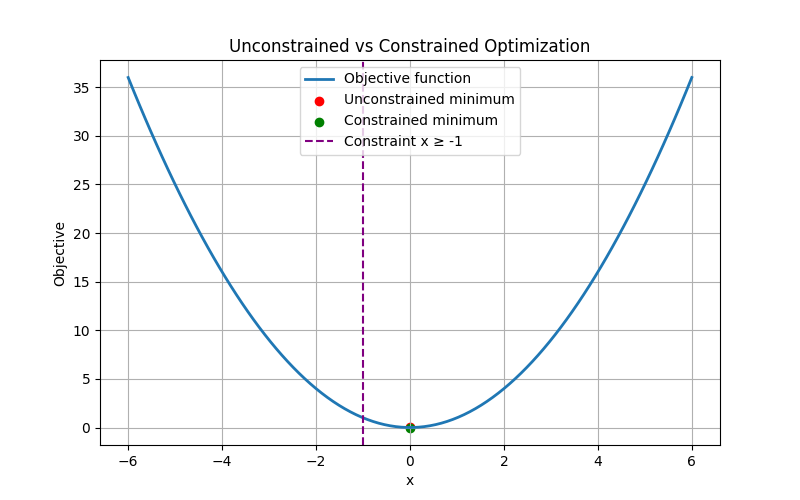

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define an objective function (simple quadratic)
def objective(x):
    return (x**2)

# Define a constraint function (e.g., x >= a)
def constraint(x, a):
    return x - a

# Function to plot unconstrained and constrained optimization
def plot_optimization(a):
    x = np.linspace(-6, 6, 100)
    y = objective(x)
    x_0 = 8.0 

    plt.figure(figsize=(8, 5))

    # Plot objective function
    plt.plot(x, y, label="Objective function", lw=2)

    # Unconstrained minimum
    x_unconstrained = minimize(objective, x0=x_0).x[0]
    plt.scatter(x_unconstrained, objective(x_unconstrained), color='red', label='Unconstrained minimum')

    # Constrained minimum
    cons = ({'type': 'ineq', 'fun': lambda x: constraint(x, a)})
    x_constrained = minimize(objective, x0=x_0, constraints=cons).x[0]
    plt.scatter(x_constrained, objective(x_constrained), color='green', label='Constrained minimum')

    # Plot constraint line
    plt.axvline(a, color='purple', linestyle='--', label=f'Constraint x ≥ {a}')

    plt.title("Unconstrained vs Constrained Optimization")
    plt.xlabel("x")
    plt.ylabel("Objective")
    plt.legend()
    plt.grid()
    plt.show()

plot_optimization(-1)


# Multi-variable Quadratic Costs

SO much of what makes optimization more complex then this are functions that have local minima (as shown above) or optimizations that have non-convex functions. However, we are lucky. For an introduction to optimal control in this class, we will mostly assume that we can write our cost function as quadratic in states ($x$) and inputs ($u$). This would take the following form:

$$ \begin{equation}
J = \int_{0}^{T} \left( \mathbf{x}(t)^{\top} \mathbf{Q} \mathbf{x}(t) + \mathbf{u}(t)^{\top} \mathbf{R} \mathbf{u}(t) \right) dt
\end{equation}$$

To solve this optimization is not easy, and we need to include our dynamics as an equality constraint (since we cannot change $x$ and $u$ independent from each other), and we do not yet know the forms for $Q$ and $R$, but hopefully you can see how we are essentially squaring $x$ and squaring $u$. The integral may be a little confusing, but you can think if it as summing the values for our states and inputs at every time step across the limits of integration. 

We will come back to this in our next lesson, but for now, let us look at just one more example of a two-variable quadratic function that includes an equality constraint. 

If we return to our cruise control example, and instead of looking at an integral or a time horizon, we just look at a single time step, we can formulate the following optimization problem: 

$$ \min_{v_{i+1},F_i} J = [v_{i+1}]^T Q [v_{i+1}] + [F_i]^T R [F_i] $$
$$ \textrm{subject to:} \quad v_{i+1} =  v_i + \dot{v}_i \Delta t = v_i + (-\frac{b}{m}v_i + \frac{F_i}{m})\Delta t$$

This may seem a little odd, but we are saying that we have a cost that is a function of our car velocity $v$ at the next time step and of our applied force $F$ at the current time step $i$. In addition, our velocity at the next time step ($i+1$) is an equality constraint that is a function of our current velocity (at time step $i$) and chosen force ($F_i$). This form of cost is quadratic for a single time step (and even for multiple time steps). The goal of this optimization is to drive the value of our cost $J$ to the lowest possible value. 

We can start by plotting the shape of our quadratic cost function, and finding the optimimum if we ignore the equality constraint that describe our dynamics. The surface represents our cost function $J$, while the red sphere shows the unconstrained minimum value for $v_{i+1}$ and $F_i$. 

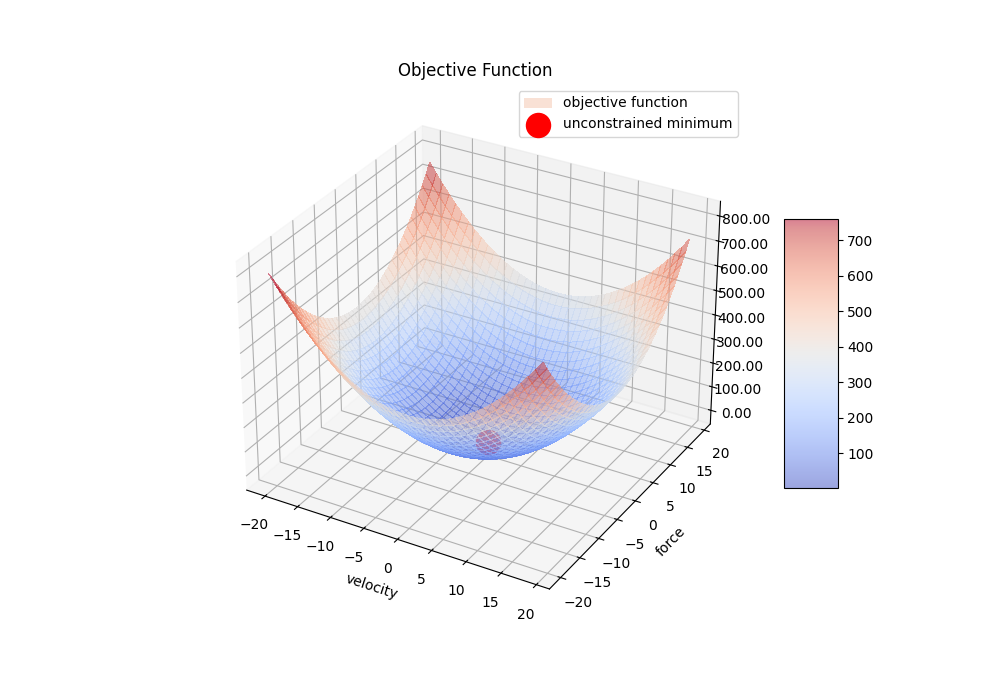

In [50]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.optimize import minimize

# Create a 3D plot of the objective function
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 7))

v = np.arange(-20, 20, 1)
F = np.arange(-20, 20, 1)

v, F = np.meshgrid(v, F)
Q = 1.0
R = 1.0

def objective(x):
    v = x[0]
    F = x[1]
    # J = v.T@Q@v + F.T@R@F
    return v*Q*v + F*R*F

J = v*Q*v + F*R*F

surf = ax.plot_surface(v, F, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       alpha=0.5,  
                       label='objective function',
                       zorder=0)
ax.zaxis.set_major_formatter('{x:.02f}')

# Unconstrained minimum
x_0 = np.random.rand(2)*10
x_unconstrained = minimize(objective, x0=x_0).x
ax.scatter(x_unconstrained[0], x_unconstrained[1], objective(x_unconstrained), color='red', label='unconstrained minimum', marker='o', s=300, alpha=1, zorder=10)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('velocity')
plt.ylabel('force')
plt.title('Objective Function') 
plt.legend(loc='best')
plt.show()

## Effect of varying Q and R 

One thing we might want to explore is to better understand the role of $Q$ and $R$. In this example, these matrices contain a single scalar, but it is the relative values between $Q$ and $R$ that will change the shape of our quadratic cost function. In plot above $Q=R=1$, but now, let's set $Q=1$ and $R=0.2$. Notice how the overall unconstrained solution did not change, but the shape is now elongated in the direction of force ($F$). Another way of thinking about this is that because $Q$ is so much higher than $R$, we will reduce our cost more by changing $v$ than by changing $F. 

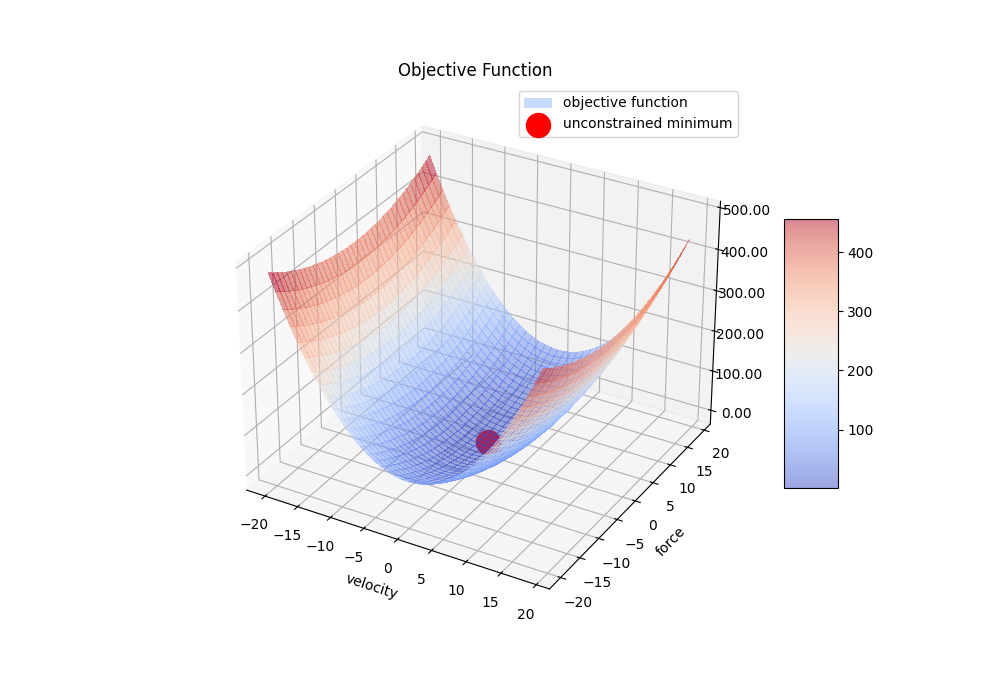

In [51]:
Q = 1.0
R = 0.2

def objective(x):
    v = x[0]
    F = x[1]
    # J = v.T@Q@v + F.T@R@F
    return v*Q*v + F*R*F


J = v*Q*v + F*R*F

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 7))
surf = ax.plot_surface(v, F, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       alpha=0.5,  
                       label='objective function',
                       zorder=0)
ax.zaxis.set_major_formatter('{x:.02f}')

# Unconstrained minimum
x_0 = np.random.rand(2)*10
x_unconstrained = minimize(objective, x0=x_0).x
ax.scatter(x_unconstrained[0], x_unconstrained[1], objective(x_unconstrained), 
           color='red', label='unconstrained minimum', marker='o', s=300, 
           alpha=1, zorder=10)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('velocity')
plt.ylabel('force')
plt.title('Objective Function') 
plt.legend(loc='best')
plt.show()

## Including the Dynamics Constraint

The problem with this solution is that it is not physically meaningful. In the example above, we seeded or started our optimization with random values for $v_{i+1}$ and $F_i$ and let it optimize with no constraint. However, in a controls problem, we do not get to set the initial velocity $v_i$ and our velocity in the cost function (which is v at the next time step $v_{i+1}$) depends on both $v_i$ and $F_i$ since we cannot change velocity instantanously. To account for this contraint, we can substitute the constraint back into the cost function (essentially removing our equality constraint, but forcing our cost to only be a function of $F_i$ now, since $v_i$ is a given): 

$$\min_{F_i} J = \left[(1-\frac{b}{m}\Delta t )v_i + \frac{F_i}{m}\Delta t \right]^T Q \left[(1-\frac{b}{m}\Delta t )v_i + \frac{F_i}{m}\Delta t \right] + [F_i]^T R [F_i] $$

Rearranging a bit, we can get the following: 
$$ \min_{F_i} J = \left[(1-\frac{b}{m}\Delta t)^2 v_i^2 + 2\left((1-\frac{b}{m}\Delta t) v_i +\frac{F_i}{m} \Delta t\right) +\frac{F_i\Delta t}{m}^2\right]^T Q \left[(1-\frac{b}{m}\Delta t)^2 v_i^2 + 2\left((1-\frac{b}{m}\Delta t) v_i +\frac{F_i}{m} \Delta t\right) +\frac{F_i\Delta t}{m}^2\right] + [F_i]^T R [F_i] $$


This process is not something we will need to do in this class. However, it allows us to now to now see the effect of including the equality constraint that describes our dynamics. This problem is still quadratic, but has some constant terms related to $v_i$ now. This shifts where the functions is centered, but the solution is still at the bottom of the "bowl". See below. 

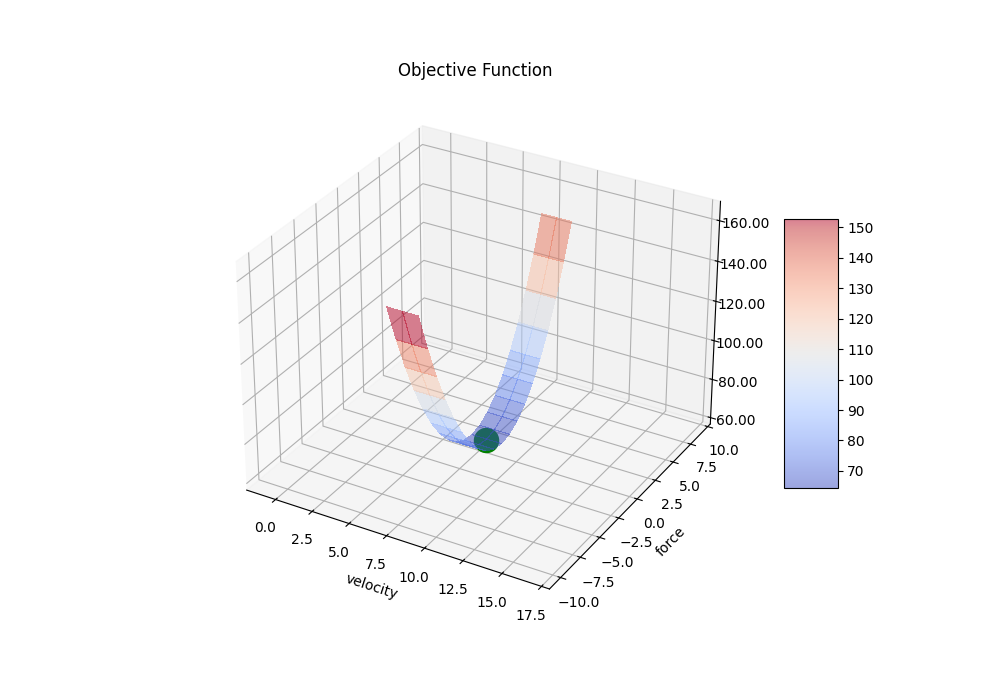

In [52]:
# define the dynamics constraint: 
m = 1
b = 0.1
def f_dyn(v, F): 
    # f_dyn = -b/m*v + F/m 
    return -b/m*v + F/m

delta_t = 0.01
Q = 1.0
R = 1.0
def objective_constrained(F): 
    v = 8.0
    J = (v+f_dyn(v, F)*delta_t)**2*Q + (F)**2 * R
    return J 

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 7))

v_i = 8.0
F = np.arange(-10, 10, 1)

v_constrained = np.arange(v_i-1, v_i+2, 1)
v_constrained, F_constrained = np.meshgrid(v_constrained, F)
J_constrained = objective_constrained(F_constrained)


surf = ax.plot_surface(v_constrained, F_constrained, J_constrained, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       alpha = 0.5, 
                       label = r'objective function for $v_i=8$',
                       zorder=0)
ax.zaxis.set_major_formatter('{x:.02f}')

# Constrained minimum
#cons = ({'type': 'ineq', 'fun': lambda x: constraint(x, a)})
x_constrained = minimize(objective_constrained, x0=10).x #minimize(objective, x0=x_0, constraints=cons).x[0]
ax.scatter(v_i, x_constrained, objective_constrained(x_constrained), 
           color='green', label='constrained minimum', 
           marker = 'o', s=300, 
           alpha=1, zorder=10)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('velocity')
plt.ylabel('force')
plt.title('Objective Function') 
plt.xlim(v_i -10, v_i + 10)
plt.show()


Interestingly, this tells us that if we care equally about velocity, and force, the best thing to do is to apply zero force ($F_i = 0$). However, this is likely not true about our problem. We mostly will care more about velocity and want to use force to drive velocity to a zero (or another desired value). 

To understand this better, we'll next just plot two more examples, where we are looking at a slice for a given $v_i=8$ (assuming this is our initially condition when we start our "controller") and using two different sets of $Q$ and $R$ as follows: 

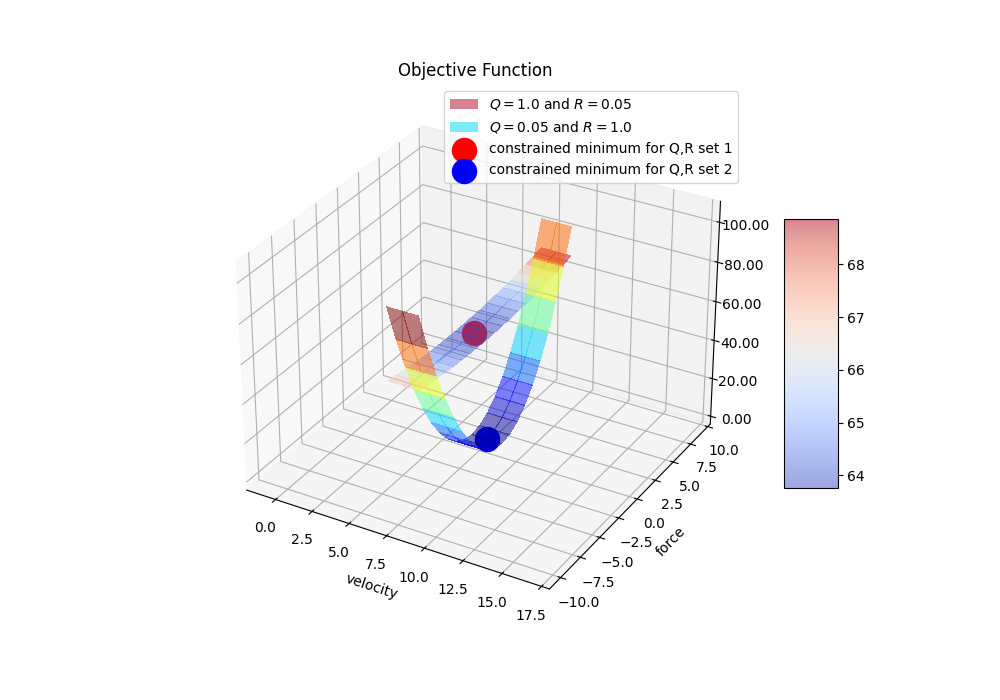

In [53]:
delta_t = 0.01
# initial velocity at time step "i"
v_i = 8.0

def objective_constrained_set1(F): 
    Q = 1.0
    R = 0.05

    v = v_i
    J = (v+f_dyn(v, F)*delta_t)**2*Q + (F)**2 * R
    return J 

def objective_constrained_set2(F): 
    Q = 0.05
    R = 1.0

    v = v_i
    J = (v+f_dyn(v, F)*delta_t)**2*Q + (F)**2 * R
    return J 


fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 7))


F = np.arange(-10, 10, 1)
v_constrained = np.arange(v_i-1, v_i+2, 1)
v_constrained, F_constrained = np.meshgrid(v_constrained, F)
J_constrained1 = objective_constrained_set1(F_constrained)
J_constrained2 = objective_constrained_set2(F_constrained)

surf = ax.plot_surface(v_constrained, F_constrained, J_constrained1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       alpha = 0.5, 
                       label = r'$Q=1.0$ and $R=0.05$',
                       zorder=0)
surf2 = ax.plot_surface(v_constrained, F_constrained, J_constrained2, cmap=cm.jet,
                       linewidth=0, antialiased=False,
                       alpha = 0.5, 
                       label = r'$Q=0.05$ and $R=1.0$',
                       zorder=0)

ax.zaxis.set_major_formatter('{x:.02f}')


x_constrained1 = minimize(objective_constrained_set1, x0=0).x #minimize(objective, x0=x_0, constraints=cons).x[0]
ax.scatter(v_i, x_constrained1, objective_constrained_set1(x_constrained1), 
           color='red', label='constrained minimum for Q,R set 1', 
           marker = 'o', s=300, 
           alpha=1, zorder=10)

x_constrained2 = minimize(objective_constrained_set2, x0=0).x #minimize(objective, x0=x_0, constraints=cons).x[0]
ax.scatter(v_i, x_constrained2, objective_constrained_set2(x_constrained2), 
           color='blue', label='constrained minimum for Q,R set 2', 
           marker = 'o', s=300, 
           alpha=1, zorder=10)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('velocity')
plt.ylabel('force')
plt.title('Objective Function') 
plt.xlim(v_i -10, v_i + 10)
plt.legend(loc='best')
plt.show()


Play with the values for $Q$ and $R$ above to better understand their effects and trade-offs. In addition, you can play with $v_i$ to see how the two examples change depending on the initial condition or current velocity ($v_i$). 

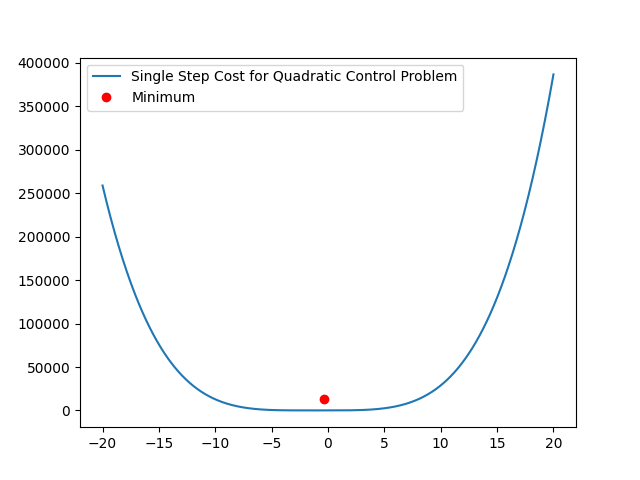

In [54]:
import numpy as np
import matplotlib.pyplot as plt


# start here, do this right, then move to pictures below. 
v_i = -10
def objective(F, v_i = -10, Q = 2, R = 1):
    delta_t = 0.01
    b = 0.5
    m = 10
    J = ((1-b/m*delta_t)**2 * v_i**2 + 2*((1-b/m*delta_t)*v_i + delta_t*F/m) + (delta_t*F/m)**2)**2 * Q + (F)**2 * R
    return J

F = np.linspace(-20, 20, 1000)
J = objective(v_i, F)

x_unconstrained = minimize(objective, x0=v_i).x[0] 


plt.figure()
plt.plot(F, J, label='Single Step Cost for Quadratic Control Problem')
plt.plot(x_unconstrained, objective(x_unconstrained), 'ro', label='Minimum')
plt.legend()